<b><font size="6" color="red">ch11. N차원 배열 다루기 </font></b>
- N차원 배열 객체
- 2차원 배열은 행렬개념으로 이해가능
- 패키지 Numpy 이용(C언어로 구현된 고성능 수치계산 패키지)
- c/c++,포트란 코드의 통합도구

# 1절 넘파이 패키지

In [1]:
import numpy as np
np.__version__

'1.20.1'

In [3]:
a = np.arange(15) #0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [5]:
from numpy import arange
a = arange(15).reshape(3,5) #3행 5열짜리 2차원
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [6]:
type(a) #a변수의 타입

numpy.ndarray

- NumPy ndarray

- 동일 타입의 원소
  - contiguous memory layout
  - 메모리 최적화, 계산 속도 향상
  - 벡터화 연산 가능

- ndarray는 일반 파이썬 List의 구현방식(Linked List)와 다르게 C의 배열(array)의 특성인 연속적인 메모리에 배치된다는 점입니다.




In [7]:
a.dtype #a변수의 요소들의 type

dtype('int32')

In [8]:
a.dtype.name # a 배열변수의 요소들의 type

'int32'

In [9]:
a.itemsize #a배열변수의 한 요소의 byte size (int32의 경우 4byte)

4

In [10]:
a.ndim #축수

2

In [11]:
a.size # 배열의 요소 갯수

15

In [12]:
a.shape #배열의 구조(3행 5열)

(3, 5)

In [14]:
a.shape = (5,3)  # 구조 변경도 가능
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [15]:
a.shape = (5,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [16]:
# dtype 속성을 바꾸면
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [17]:
a.size

12

In [18]:
a.dtype

dtype('int32')

In [20]:
a.shape = (1,12)  #데이터의 변질 없다
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [21]:
a.dtype

dtype('int32')

In [22]:
a.dtype = np.int64 #형변환이 되지 않음

In [23]:
a.dtype

dtype('int64')

In [24]:
a

array([[ 4294967296, 12884901890, 21474836484, 30064771078, 38654705672,
        47244640266]], dtype=int64)

In [25]:
a.size

6

# 2절. 넘파이 배열
- array()함수를 이용한 다른 파이썬 구조(백터구조)를 넘파이 배열로 변환
- 넘파이 배열을 생성하는 기타 함수들 : arange, ones, zeros
- 특수 라이브러리 함수 (ex.random)이용
- [넘파이 doc](https://numpy.org/doc/stable/index.html)

## 2.1 array()함수로 넘파이 배열 만들기

In [30]:
import numpy as np
a = np.array([2,4,6], dtype=np.int16) #정수의 기본 타입은 int32
a


array([2, 4, 6], dtype=int16)

In [27]:
a[0]

2

In [28]:
for i in a:
    print(i, end='\t')

2	4	6	

In [31]:
a.dtype

dtype('int16')

In [32]:
b =np.array([(1.5, 2.3),(4,5)]) # 자동 dtype셋팅 (float64형)
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [33]:
b =np.array([(1.5, 2.3),(4,5)]).reshape(1,4) # 자동 dtype셋팅 (float64형)
b

array([[1.5, 2.3, 4. , 5. ]])

In [37]:
a = np.array([1,2,3,4.1], dtype=np.float32).reshape(2,2) #2행 2열짜리 2차원 배열
a

array([[1. , 2. ],
       [3. , 4.1]], dtype=float32)

In [38]:
a.dtype

dtype('float32')

In [39]:
b = np.array([[1,2,3],[4,5,6]], dtype=np.int64) # dtype 인수를 통해 타입 세팅
b

array([[1, 2, 3],
       [4, 5, 6]], dtype=int64)

In [40]:
b.dtype

dtype('int64')

In [41]:
#b.dtype = np.int32 안됨
b = b.astype(np.int32) #dtype바꾸기
b

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
b.dtype

dtype('int32')

In [43]:
list_ = [[1,2,3,],[4,5,6]]
list_

[[1, 2, 3], [4, 5, 6]]

In [44]:
for row in list_:
    for data in row:
        print(data, end='\t')
    print()

1	2	3	
4	5	6	


In [45]:
for i, row in enumerate(list_):
    for j, data in enumerate(row):
        print("{}행 {}열 : {}".format(i,j, data), end='\t')

0행 0열 : 1	0행 1열 : 2	0행 2열 : 3	1행 0열 : 4	1행 1열 : 5	1행 2열 : 6	

In [46]:
list_[0][1] #리스트에서의 인덱싱

2

In [47]:
list_[0][0:3] #리스트에서의 인덱싱 슬라이싱

[1, 2, 3]

In [48]:
# 2차원 배열
b = np.array([[1,2,3],[4,5,6]], dtype=np.int16)
b

array([[1, 2, 3],
       [4, 5, 6]], dtype=int16)

In [50]:
for row in b:
    for item in row:
        print(item, end='\t')
    print()

1	2	3	
4	5	6	


In [51]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print("{}행 {}열 : {}".format(i,j,item), end ='\t')
    print()

0행 0열 : 1	0행 1열 : 2	0행 2열 : 3	
1행 0열 : 4	1행 1열 : 5	1행 2열 : 6	


In [53]:
b[0][1], b[0,1] #넘파이 배열에서의 인덱싱

(2, 2)

In [54]:
b[0, 0:3]

array([1, 2, 3], dtype=int16)

In [55]:
c = np.array([[1,2],[3,4]],dtype=complex) #dtype이 복소수
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [56]:
a=10
b=a  # 스칼라 변수의 복수
a=9
print(b)

10


In [59]:
# numpy 배열
c = np.array([[1,2,],[3,4]])
d = np.array(c, copy=False) #d=c
print('c=',c, sep='\n')
print('d= ',d,sep='\n')
print('두변수의 주소 :',id(c), id(d))
d[0,0] = 999
print('d[0,0]을 변경항 이후')
print('c=',c, sep='\n')
print('d= ',d,sep='\n')

c=
[[1 2]
 [3 4]]
d= 
[[1 2]
 [3 4]]
두변수의 주소 : 2433220137104 2433220137104
d[0,0]을 변경항 이후
c=
[[999   2]
 [  3   4]]
d= 
[[999   2]
 [  3   4]]


In [61]:
# numpy 배열 변수 복사
c = np.array([[1,2,],[3,4]], dtype = np.int32)
d = np.array(c, copy=True, dtype = np.int16) # 깊은 복사
print('c 요소의 dtype :', c.dtype)
print('d 요소의 dtype :', d.dtype)
d[0,0] =  999
print('c=',c,sep='\n')
print('d=',d,sep='\n')

c 요소의 dtype : int32
d 요소의 dtype : int16
c=
[[1 2]
 [3 4]]
d=
[[999   2]
 [  3   4]]


In [62]:
c = np.array([[1,2,],[3,4]], dtype = np.int32)
d = np.array(c, copy=False, dtype = np.int16) # copy =False라도 dtype이 바뀌면 깊은 복사
print('c 요소의 dtype :', c.dtype)
print('d 요소의 dtype :', d.dtype)
d[0,0] =  999
print('c=',c,sep='\n')
print('d=',d,sep='\n')

c 요소의 dtype : int32
d 요소의 dtype : int16
c=
[[1 2]
 [3 4]]
d=
[[999   2]
 [  3   4]]


## 2.2 기본값이 있는 배열 만들기
    - np.zeros(tup) : 요소들이 다 0
	- np.ones(tup) : 요소들이 다 1
 	- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 달라짐)
	연속된 값을 갖는 배열 생성
    * 이렇게 생성된 배열은 기본 dtype이 float64.dtype속성을 통해 따로 지정할 수 있음

In [67]:
np.zeros((3,5))   #3행 4열짜리 2차원 배열(요소 값이 다 0.0)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [69]:
x = np.zeros((3,5),dtype=np.int16)   #3행 4열짜리 2차원 배열(요소 값이 다 0.0)
print(x)
print(x.dtype)
print(x.itemsize, 'byte')

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
int16
2 byte


In [70]:
np.ones((2,5), dtype=np.int8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [71]:
np.empty((2,3)) #초기값이 메모리 상태에 따른 임의의 값

array([[0., 0., 0.],
       [0., 0., 0.]])

## 2.3 연속된 값을 갖는 배열 만들기
- np.arange(from, to, by, dtype=None) : from 부터 to앞까지 by씩 건너뛴 값(to 미포함)을 목록으로 n차원 배열을 만듭니다.
  from생략시 0 by생략시 1
- np.linspace(from, to, num) : from부터 to까지 num개 숫자들을 N차원 배열로 만듦
- np.random.normal(0,1,100) #평균이 0이고 표준편차가 1인 수 100개로 배열을 만듬
- np.random.random(tup) : 0-1사이의 난수 발생 tup

In [73]:
np.arange(10,30,5, dtype=np.float32)

array([10., 15., 20., 25.], dtype=float32)

In [74]:
np.arange(0,2,0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [77]:
from numpy import linspace
linspace(0,2,20) #1차원 백터
linspace(0,2,20).reshape(4,5) #4행 5열

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263],
       [0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421],
       [1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [80]:
# 많은 수의 점들을 생성할 때 유용 : linspace
from numpy import pi
x = linspace(0,2*pi,100)
x
f = np.sin(x)
f

array([ 0.00000000e+00,  6.34239197e-02,  1.26592454e-01,  1.89251244e-01,
        2.51147987e-01,  3.12033446e-01,  3.71662456e-01,  4.29794912e-01,
        4.86196736e-01,  5.40640817e-01,  5.92907929e-01,  6.42787610e-01,
        6.90079011e-01,  7.34591709e-01,  7.76146464e-01,  8.14575952e-01,
        8.49725430e-01,  8.81453363e-01,  9.09631995e-01,  9.34147860e-01,
        9.54902241e-01,  9.71811568e-01,  9.84807753e-01,  9.93838464e-01,
        9.98867339e-01,  9.99874128e-01,  9.96854776e-01,  9.89821442e-01,
        9.78802446e-01,  9.63842159e-01,  9.45000819e-01,  9.22354294e-01,
        8.95993774e-01,  8.66025404e-01,  8.32569855e-01,  7.95761841e-01,
        7.55749574e-01,  7.12694171e-01,  6.66769001e-01,  6.18158986e-01,
        5.67059864e-01,  5.13677392e-01,  4.58226522e-01,  4.00930535e-01,
        3.42020143e-01,  2.81732557e-01,  2.20310533e-01,  1.58001396e-01,
        9.50560433e-02,  3.17279335e-02, -3.17279335e-02, -9.50560433e-02,
       -1.58001396e-01, -

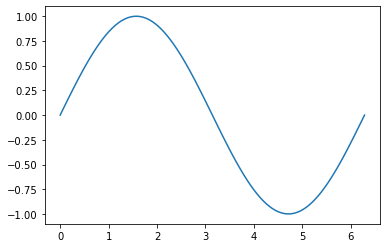

In [81]:
import matplotlib.pyplot as plt
plt.plot(x,f) #그래프 그림
plt.show() # 매세지 없애줌

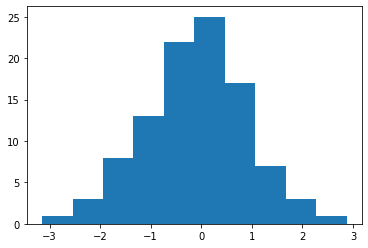

In [87]:
np.random.seed(12)
x = np.random.normal(0,1,100) #평균이 0이고 표준편차가 1인 수 100개로 배열을 만듬
plt.hist(x)
plt.show()

## 2.4 배열의 차원 변경하기

In [88]:
np.random.seed(123)
t = np.random.random((2,3)) # 0부터 1미만인 실수 난수발생 (2행3열 배열)
t

array([[0.69646919, 0.28613933, 0.22685145],
       [0.55131477, 0.71946897, 0.42310646]])

In [90]:
a = np.floor(t*10)
a

array([[6., 2., 2.],
       [5., 7., 4.]])

In [91]:
a.shape

(2, 3)

In [92]:
a.ravel() # 차원이 풀린 배열을 반환(a가 바뀌는 것은 아님)

array([6., 2., 2., 5., 7., 4.])

In [93]:
a

array([[6., 2., 2.],
       [5., 7., 4.]])

In [95]:
a.reshape(3,2) # shape가 수정된 배열을 반환 (a는 그대로)

array([[6., 2.],
       [2., 5.],
       [7., 4.]])

In [96]:
a

array([[6., 2., 2.],
       [5., 7., 4.]])

In [97]:
# a는 2행 3열짜리 2차원 배열. 2차원 배열은 행렬(Matrix)이해
a.T # 전치행렬(행과 열을 거꾸로)

array([[6., 5.],
       [2., 7.],
       [2., 4.]])

In [98]:
a.transpose() # 전치행렬 반환(a는 그대로)

array([[6., 5.],
       [2., 7.],
       [2., 4.]])

In [100]:
a.reshape(3,-1) #-1로 주어지면 해당 차원의 크기가 자동 계산

array([[6., 2.],
       [2., 5.],
       [7., 4.]])

In [103]:
a.reshape(-1,2) #-1은 자동 계산(a는 그대로)

array([[6., 2.],
       [2., 5.],
       [7., 4.]])

In [102]:
a

array([[6., 2., 2.],
       [5., 7., 4.]])

In [104]:
# a.shape =(1,6)
a.resize((1,6))
a

array([[6., 2., 2., 5., 7., 4.]])

In [105]:
a.resize(-1,2)  #resize는 -1불가

ValueError: negative dimensions not allowed

In [107]:
a = a.reshape(2,3)
a

array([[6., 2., 2.],
       [5., 7., 4.]])

In [110]:
# 로또번호 6개(1-45)를 구해서 sort하여 1차원 배열에 넣고 출력하기
a = np.floor(np.random.random(6)*45)+1
    

array([24., 24., 29., 39., 33., 28.])

In [111]:
while True:
    a = np.floor(np.random.random(6)*45)+1
    a = [int(x) for x in a]
    if len(set(a)) == 6:
        a.sort()
        print(a)
        break;

[11, 14, 15, 17, 29, 33]


## 2.5 배열 인쇄

In [113]:
#배열이 너무 큰 경우 인쇄할 수 없는 경우
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


In [114]:
print(np.arange(10000).reshape(10,1000))

[[   0    1    2 ...  997  998  999]
 [1000 1001 1002 ... 1997 1998 1999]
 [2000 2001 2002 ... 2997 2998 2999]
 ...
 [7000 7001 7002 ... 7997 7998 7999]
 [8000 8001 8002 ... 8997 8998 8999]
 [9000 9001 9002 ... 9997 9998 9999]]


In [118]:
# 배열이 너무 커서 인쇄할 수 없는 경우는 자동적으로 건너뛰고 모서리만 출력
# 이동작을 비활성화하고 넘파이 배열 전체가 출력되도록 하려면
# 인쇄 옵션을 변경 threshold값 큰값으로 조정
import sys
np.set_printoptions(threshold=10000)
np.set_printoptions(threshold=sys.maxsize) #시스탬 최고 크기
np.set_printoptions(threshold=np.inf) #np.inf=무한데
# 커널 재시작시 다시 원상복귀


In [119]:
print(np.arange(10000).reshape(10,1000))

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45   46   47   48   49   50   51   52   53   54   55
    56   57   58   59   60   61   62   63   64   65   66   67   68   69
    70   71   72   73   74   75   76   77   78   79   80   81   82   83
    84   85   86   87   88   89   90   91   92   93   94   95   96   97
    98   99  100  101  102  103  104  105  106  107  108  109  110  111
   112  113  114  115  116  117  118  119  120  121  122  123  124  125
   126  127  128  129  130  131  132  133  134  135  136  137  138  139
   140  141  142  143  144  145  146  147  148  149  150  151  152  153
   154  155  156  157  158  159  160  161  162  163  164  165  166  167
   168  169  170  171  172  173  174  175  176  177  178  179  180  181
   182  183  184  185  186  187  188  189  190  191  192  193  1

## 2.6 기본 연산동작

### 1) 배열의 요소별 연산

In [120]:
a = np.array([20,30,40,50])
b = np.arange(4)
print(a)
print(b)

[20 30 40 50]
[0 1 2 3]


In [121]:
a + b

array([20, 31, 42, 53])

In [122]:
a - b

array([20, 29, 38, 47])

In [123]:
a * b

array([  0,  30,  80, 150])

In [124]:
a < 35 # 요소별 연산

array([ True,  True, False, False])

In [125]:
# a배열에서 35보다 큰 데이터만 추출
a[a>35]

array([40, 50])

### 2) 행렬의 곱(@, dot함수) cf. *(요소별 곱)

In [127]:
A = np.array([[1,1],
             [0,1]])

In [128]:
B = np.array([[2,0]
             ,[3,4]])

In [129]:
A,B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [130]:
print("요소별 곱 A*B = ",A*B, sep='\n')
print('행렬 곱 A@B = ',A@B, sep='\n')
print('행렬 곱 A.dot(B) =',A.dot(B),sep='\n')

요소별 곱 A*B = 
[[2 0]
 [0 4]]
행렬 곱 A@B = 
[[5 4]
 [3 4]]
행렬 곱 A.dot(B) =
[[5 4]
 [3 4]]


### 3) 복합 대입 연산자 사용(+=,-=,*=,....)

In [131]:
a = np.ones((2,3),dtype=int) #2차원 2행2열 배열(dtype=int32)
a

array([[1, 1, 1],
       [1, 1, 1]])

In [133]:
b = np.random.random((2,3)) #2차원 2행 3열짜리 배열 (dtype = float64)
b

array([[0.42635131, 0.89338916, 0.94416002],
       [0.50183668, 0.62395295, 0.1156184 ]])

In [134]:
a +=3 # a = a+3
a

array([[4, 4, 4],
       [4, 4, 4]])

In [135]:
b+=a # b = b+a
b

array([[4.42635131, 4.89338916, 4.94416002],
       [4.50183668, 4.62395295, 4.1156184 ]])

In [136]:
a+=b # a = a+b 에러 . b가 float64이여서 a+b가 float64이기 때문

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [137]:
a = np.ones(3, dtype=np.int16)
b = np.linspace(0, np.pi, 3) # float64
print(a)
print(b)

[1 1 1]
[0.         1.57079633 3.14159265]


In [138]:
c = a+b
print(c)
print(c.dtype)

[1.         2.57079633 4.14159265]
float64


In [139]:
c = a + b * 1j
c

array([1.+0.j        , 1.+1.57079633j, 1.+3.14159265j])

In [140]:
c.dtype

dtype('complex128')

### 4) 배열 요소별 집계 : 배열요소 전체의 sum, min, .... 

In [141]:
a = np.array([[2,2,2,4],[4,3,2,1]])
a

array([[2, 2, 2, 4],
       [4, 3, 2, 1]])

In [144]:
print('전체 합 :',a.sum())
print('전체 평균 :',a.mean())
print('전체 최소값 :',a.min())
print('전체 최대값 :',a.max())
print('전체 분산 :',a.var())
print('전체 표준편차 :',a.std())

전체 합 : 20
전체 평균 : 2.5
전체 최소값 : 1
전체 최대값 : 4
전체 분산 : 1.0
전체 표준편차 : 1.0


### 5) 배열 축별 집계 : 행별 sum, min, ... 열별 sum, min,.... 

In [145]:
a = np.array([[2,2,2,4],[4,3,2,1]])
a

array([[2, 2, 2, 4],
       [4, 3, 2, 1]])

In [146]:
print('a배열의 행별 합(결과는 2열) : ', a.sum(axis=1))

a배열의 행별 합(결과는 2열) :  [10 10]


In [148]:
print('a배열의 열별 합(결과는 4열) : ', a.sum(axis=0))

a배열의 열별 합(결과는 4열) :  [6 5 4 5]


In [150]:
print('a배열의 행별 최소값 : ',a.min(axis=1))
print('a배열의 열별 최소값 : ',a.min(axis=0))

a배열의 행별 최소값 :  [2 1]
a배열의 열별 최소값 :  [2 2 2 1]


In [151]:
print('a배열의 행별 최대값 : ',a.max(axis=1))
print('a배열의 열별 최대값 : ',a.max(axis=0))

a배열의 행별 최대값 :  [4 4]
a배열의 열별 최대값 :  [4 3 2 4]


In [152]:
print('a배열의 행별 평균값 : ',a.mean(axis=1))
print('a배열의 열별 평균값 : ',a.mean(axis=0))

a배열의 행별 평균값 :  [2.5 2.5]
a배열의 열별 평균값 :  [3.  2.5 2.  2.5]


In [153]:
'''
    array([[2,2,2,4],[4,3,2,1]])
'''
print('a배열의 행별 최대값이 있는 index : ', a.argmax(axis=1))

a배열의 행별 최대값이 있는 index :  [3 0]


In [154]:
# 누적합
print(a)
print(a.cumsum(axis=1)) #행별로 누적합

[[2 2 2 4]
 [4 3 2 1]]
[[ 2  4  6 10]
 [ 4  7  9 10]]


In [155]:
print(a.cumsum(axis=0)) #열별로 누적합

[[2 2 2 4]
 [6 5 4 5]]


In [157]:
b = np.arange(24).reshape(2,3,4) # 2면 3행 4열 짜리 3차원 배열
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [158]:
b.sum(), b.min(), b.max(), b.mean(), b.std(), b.var() #배열 전체에 대한 집계값

(276, 0, 23, 11.5, 6.922186552431729, 47.916666666666664)

In [159]:
# 분산에 루트 씌우면 표준편차
import math
math.sqrt(b.var()) #math.sqrt()매개변수에 스칼라 값

6.922186552431729

In [161]:
np.sqrt(b.var()) #math.sqrt() 매개변수에 스칼라값, 배열 가능

6.922186552431729

In [162]:
b.sum(axis=0) #면은 빼고, 같은 행 같은열끼리 sum
# 12 0면의 0행 0열 +1면 0행 0열(같은 행렬끼리)

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [164]:
print(b)
b.sum(axis=1) #행은 빼고 같은 면 같은 열끼리 합

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [165]:
print(b)
b.sum(axis=2) #열은 빼고 같은 면 같은 행끼리 합

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[ 6, 22, 38],
       [54, 70, 86]])

## 2.7 그외 함수들(난수발생: 1차원 배열, 요소연산)

In [4]:
import numpy as np
a = np.arange(3)
print('a =', np.sqrt(a))
import math
# math.sqrt(a) #매개변수에 스칼라만 가능


a = [0.         1.         1.41421356]


In [6]:
b= np.array([10,11,12])
a+b

array([10, 12, 14])

In [7]:
np.add(a,b)

array([10, 12, 14])

In [8]:
np.random.rand(5) # 0 -1 미만의 난수를 5개 발생(균일분포에서 난수)(1차원만 가능)

array([0.91141891, 0.33914711, 0.75804805, 0.8366698 , 0.9981538 ])

In [9]:
np.random.randn(5) # 평균0이고 표준편차가 1인 정규분포(표준정규분포)에서 난수5개 발생

array([ 0.44333302,  0.41688365,  1.86410158, -0.32903668, -2.41489155])

In [10]:
np.random.randint(5) #0부터 5미만의 정수 난수 발생

3

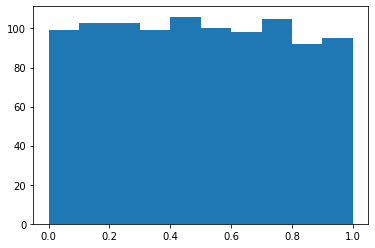

In [14]:
# randn()가 균일분포에서 난수 발생하는지 확인
import matplotlib.pyplot as plt
x = np.random.rand(1000)
plt.hist(x)
plt.show()

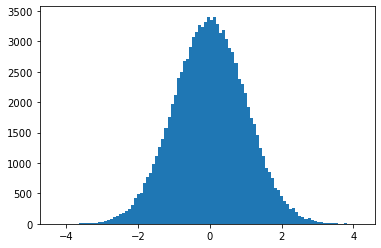

In [20]:
#randn() : 표준정규분포내 난수 발생
x = np.random.randn(100000)
plt.hist(x, bins=100) #bins=10 x축구간이 10개
plt.show()

In [22]:
# 메모리 사용량과 속도 측정(메모리 프로파일러)를 로드하고 
#       임의의 데이터 생성후 +, np.add 비교
# 아나콘다 프롬프트 memory_profiler 패키지 install
%load_ext memory_profiler
A = np.random.randn(100000000)
B = np.random.randn(100000000)
C = np.random.randn(100000000)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [ ]:
# %%time : 셀을 실행할 때 소요 시간 출력
# %memit : 메모리 사용량 출력

In [23]:
%%time
%memit G = A*B+C
print(G)

peak memory: 3752.82 MiB, increment: 1350.02 MiB
[ 2.84762059e-01 -1.85929440e+00 -5.34490708e-04 ...  9.30722654e-01
 -6.85903199e-01 -4.51712978e-01]
Wall time: 1.28 s


In [24]:
%%time
%memit T = A*B;
G = T+C;
del T
print(G)

peak memory: 3928.76 MiB, increment: 762.94 MiB
[ 2.84762059e-01 -1.85929440e+00 -5.34490708e-04 ...  9.30722654e-01
 -6.85903199e-01 -4.51712978e-01]
Wall time: 1.33 s


In [25]:
%%time
%memit G = A*B; G+=C
print(G)

peak memory: 3618.58 MiB, increment: 452.76 MiB
[ 2.84762059e-01 -1.85929440e+00 -5.34490708e-04 ...  9.30722654e-01
 -6.85903199e-01 -4.51712978e-01]
Wall time: 1.1 s


In [ ]:
# np.add()경우 배열 요소별 연산을 할 경우 메모리 절약

In [27]:
%%time
%memit T = A*B; G = np.add(C,G)
print(G)

peak memory: 4608.95 MiB, increment: 683.98 MiB
[ 1.01825092 -5.29463697  0.05477546 ...  2.198037    0.93843021
 -2.86361837]
Wall time: 1.27 s


## 2.8 브로드 캐스팅

In [28]:
# 1차원 배열인 경우
a = np.array([1,2,3])
b = 10
np.add(a,b)

array([11, 12, 13])

In [29]:
# 2차원 배열인 경우
a = np.array([[0,0,0.,],
             [10,10,10],
             [20,20,20],
             [30,30,30]])
b = np.array([5,5,5])
np.multiply(a,b)

array([[  0.,   0.,   0.],
       [ 50.,  50.,  50.],
       [100., 100., 100.],
       [150., 150., 150.]])

In [30]:
# 2차원 배열인 경우
a = np.array([[0,0,0.,],
             [10,10,10],
             [20,20,20],
             [30,30,30]])
b = np.array([[5],[5],[5],[5]])
np.multiply(a,b)

array([[  0.,   0.,   0.],
       [ 50.,  50.,  50.],
       [100., 100., 100.],
       [150., 150., 150.]])

In [31]:
a = np.array([0,10,20,30]) #1행4열
# newwaxis 연산자를 이용하여 배열에 새로운 축을 추가해서 2차원인 4행 1열로 변환

In [35]:
x = a[:, np.newaxis]
x

array([[ 0],
       [10],
       [20],
       [30]])

In [37]:
b = np.array([1,2,3])
b

array([1, 2, 3])

In [39]:
result = np.add(x,b)
result

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [41]:
result[1,2] == a[1]+b[2]

True

# 3절. 배열합치기/ 분할하기

In [42]:
a = np.arange(10) * 3
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

## 3.1 인덱싱과 슬라이싱

In [43]:
# 1) 인덱싱
a[2]

6

In [44]:
a[-1]

27

In [45]:
a[10]

IndexError: index 10 is out of bounds for axis 0 with size 10

In [46]:
# 슬라이싱
a[2:5] #2번쩨부터 5번째 앞까지
a[2:5]

array([ 6,  9, 12])

In [47]:
a[0:100:2] #슬라이싱은 벗어난 인덱스 값도 가능

array([ 0,  6, 12, 18, 24])

In [48]:
a[:6:2] = -99
a

array([-99,   3, -99,   9, -99,  15,  18,  21,  24,  27])

도움말 문서들
- 인덱싱 : https://docs.scipy.org/doc/numpy/user/basics.indexing.html
- 배열 인덱싱 : https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
- newaxis : https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.newaxis

In [49]:
# 3) 다차원 배열의 인덱싱 & 슬라이싱
a = np.arange(20).reshape(5,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [50]:
a[2,2]

10

In [51]:
# 마지막 열들만
a[:,-1]

array([ 3,  7, 11, 15, 19])

In [52]:
# 0~2행까지의 마지막 열들만 추출
a[0:3,-1]

array([ 3,  7, 11])

In [53]:
# 모든행의 마지막 열을 제외한 데이터 추출
a[:,:-1]

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14],
       [16, 17, 18]])

In [55]:
# 0~4행까지 모든 열
a[0:5, ] #열을 생략하면 모든 열

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [56]:
a[0:5]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [57]:
a[0:3, ...] # ...누락된 인덱스 전부

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [58]:
a[...,-1] #전체행 마지막 열

array([ 3,  7, 11, 15, 19])

In [62]:
# 모든 행에 마지막열, 마지막 전열
a[...,-1:-3:-1]

array([[ 3,  2],
       [ 7,  6],
       [11, 10],
       [15, 14],
       [19, 18]])

In [63]:
# 모든 행에 마지막 전열, 마지막 열
a[..., -2::]

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15],
       [18, 19]])

In [64]:
# 1~3행, 0~1열
a[1:4,0:2]

array([[ 4,  5],
       [ 8,  9],
       [12, 13]])

## 3.2 두 배열을 쌓아 합치는 함수
**- vstack(tup) : 아래에 추가하는 방식으로 쌓아 합침** <br>
**- hstack(tup) : 옆으로 추가하는 방식으로 합침** <br>
**- dstack(tup) : 마지막 축(열)을 쌓아 합침.0열들낄 쌓고 1열들 끼리 쌓고** 

In [65]:
c = np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [66]:
a,b = c[0,:,:],c[1]
print(a)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [67]:
np.vstack((a,b)) #수직으로 합치기

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [68]:
np.hstack((b,a)) #수평으로 합치기

array([[12, 13, 14, 15,  0,  1,  2,  3],
       [16, 17, 18, 19,  4,  5,  6,  7],
       [20, 21, 22, 23,  8,  9, 10, 11]])

In [69]:
np.dstack((a,b)) #열들끼리 쌓아 면을 이룸

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

- column_stack(tup) : 1차원 배열을 열단위로 배열하여 2차원 배열로 합침

In [70]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])

In [71]:
np.column_stack((a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [72]:
a[:,np.newaxis],b[:,np.newaxis],c[:,np.newaxis]

(array([[1],
        [2],
        [3],
        [4]]),
 array([[5],
        [6],
        [7],
        [8]]),
 array([[ 9],
        [10],
        [11],
        [12]]))

In [73]:
np.hstack((a[:,np.newaxis],b[:,np.newaxis],c[:,np.newaxis]))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

- row_stack((tup)) : 행단위로 쌓아줌 == vstack()

In [74]:
np.row_stack((a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [75]:
np.vstack((a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

- stack(tup, axis=n) : axis 속성에 따라 배열을 합침
    * axis = 0: 첫번째 차원, axis=-1이면 마지막 차원

In [80]:
a = np.arange(12).reshape(3,4)
print(a)
b = np.arange(12,24).reshape(3,4)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [79]:
np.stack((a,b), axis=0)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [81]:
np.stack((a,b), axis=1) #행끼리 합쳐 면을 이룸

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [84]:
np.stack((a,b), axis=2) #열끼리 합쳐 면을 이룸

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_

In [85]:
a = np.array([1,2,3,4,])
b = np.array([5,6,7,8,])
c = np.array([9,10,11,12,])

In [86]:
np.r_[a,b,c] #한행으로 쌓는 것

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [87]:
np.r_[[a],[b],[c]]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [88]:
a

array([1, 2, 3, 4])

In [89]:
[a]

[array([1, 2, 3, 4])]

In [90]:
np.c_[a,b,c]

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [91]:
np.column_stack((a,b,c,))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## 3.4하나의 배열을 여러개 작은 배열로 분할하기
**-vsplit(ary, indecies_or_section): 첫번째 축(2차원의 경우 가로축)을 따라 분할** <br>
**-hsplit(ary, indecies_or_section): 두번째 축(2차원의 경우 새로추)을 따라 분할** <br>
**-dsplit(ary, indecies_or seciton): 3번째 차원을 나눔** <br>
    * indeces_or_sections : 정수n (n개의 seciton으로 나눔) <br>
                            [3,6] (3번과 5번 인덱스 기점으로 나눔)

In [93]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [94]:
a_vsplit = np.vsplit(a, 3) #가로축을 따라 3개의 배열로 분할
a_vsplit #첫번째 축을 분할한다

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [97]:
type(a_vsplit)

list

In [95]:
np.vsplit(a,[2]) #인덱스

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [96]:
np.vsplit(a,[1,2]) #1,2번 인덱스 기준으로 3개 배열로 분할

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [99]:
np.hsplit(a,2) #세로축을 나눠 2개의 배열로 분할, 2번째 차원을 분할

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [101]:
b = np.arange(24).reshape(2,3,4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [103]:
np.vsplit(b,2) #첫번째 축(면)을 분할

[array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]]),
 array([[[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])]

In [105]:
b_split = np.hsplit(b,3)
b_split

[array([[[ 0,  1,  2,  3]],
 
        [[12, 13, 14, 15]]]),
 array([[[ 4,  5,  6,  7]],
 
        [[16, 17, 18, 19]]]),
 array([[[ 8,  9, 10, 11]],
 
        [[20, 21, 22, 23]]])]

In [106]:
b_split[0].shape

(2, 1, 4)

In [109]:
b_split = np.dsplit(b,2) #3번째 축(열)을 기준으로 2개를 분할
b_split

[array([[[ 0,  1],
         [ 4,  5],
         [ 8,  9]],
 
        [[12, 13],
         [16, 17],
         [20, 21]]]),
 array([[[ 2,  3],
         [ 6,  7],
         [10, 11]],
 
        [[14, 15],
         [18, 19],
         [22, 23]]])]

In [110]:
b_split[0].shape

(2, 3, 2)

**- split(ary, indecies_or seciton, axis=?)**

        * axis가 0이면 vsplit 
        * 1이면 hsplit
        * 2이면 dsplit 3차원 이상에서 동작하며 dsplit()과 동일

In [111]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [113]:
np.split(a, 2, axis=0) #vsplit과 동일

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [114]:
np.split(a, 2, axis=1) #hsplit과 동일

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

**- array_split(ary, indecies_or seciton, axis=?)**

    * split()과 차이점은 나눠지지 않는 정수로도 사용 가능

In [115]:
np.array_split(a,3,axis=1)

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]